**Alumno:** Romero Sánchez del Valle Efraín Alejandro

In [1]:
!pip install spacy datasets matplotlib
!python -m spacy download es_core_news_md

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 17.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import random
import string
from collections import Counter

import spacy
from collections import Counter
from datasets import load_dataset
import matplotlib.pyplot as plt


#Problema 1

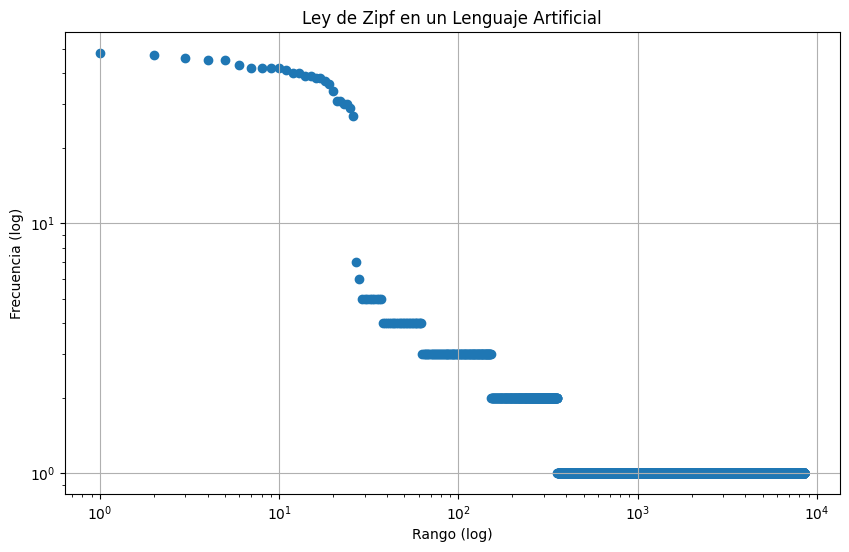

In [3]:
# Parámetros
num_palabras = 10000  # Número total de palabras generadas
longitud_palabra_max = 10  # Longitud máxima de las palabras
palabras=[]
for _ in range(num_palabras):
  #Elegir una longitud aleatoria
  longitud_palabra=random.randint(1,longitud_palabra_max)
  #Realizar una palabra aleatoria con longitud aleatoria
  palabra=''.join(random.choices(string.ascii_lowercase,k=longitud_palabra))
  #Guardamos las palabras
  palabras.append(palabra)

#Contamos la frecuencia de las palabras
frecuencias= Counter(palabras)

# Ordenar las frecuencias de mayor a menor
frecuencias_ordenadas = sorted(frecuencias.values(), reverse=True)

# Crear el rango de las palabras
rango = range(1, len(frecuencias_ordenadas) + 1)

# Graficar en escala log-log
plt.figure(figsize=(10, 6))
plt.scatter(rango, frecuencias_ordenadas, marker="o")
plt.xlabel('Rango (log)')
plt.ylabel('Frecuencia (log)')
plt.xscale('log')
plt.yscale('log')
plt.title('Ley de Zipf en un Lenguaje Artificial')
plt.grid(True)
plt.show()


#Conclusiones ejercicio 1

Lo que podemos observar es que la Ley de Zipf no se cumple o al menos no del todo. Al tratarse de palabras y longitudes aleatorias la variabilidad aumenta mucho y hay mucho ruido sin sentido, si bien es cierto que pareciera ser que conforme la cantidad de tipos aumenta la frecuencia de las palabras disminuye no podemos ver una relación lineal en escala logarítmica como deberíamos de verlo en lenguas naturales. Esto yo lo atribuyo a la naturaleza humana que tenemos a la hora de comunicarnos y crear un lenguaje que, en un principio podría parecer aleatorio, sin embargo, contiene características innatas de los seres humanos.

#Problema 2


Datasets escogidos:

https://huggingface.co/datasets/EleutherAI/lambada_openai?library=datasets

**Dominio.**

Narrativas en español (historias, cuentos).

**Resumen del corpus.**

Este conjunto de datos incluye la división de pruebas LAMBADA preprocesada por OpenAI (consulte los debates pertinentes aquí y aquí ). También contiene versiones traducidas automáticamente de la división en alemán, español, francés e italiano.

LAMBADA se utiliza para evaluar las capacidades de los modelos computacionales para la comprensión de textos mediante una tarea de predicción de palabras. LAMBADA es una colección de textos narrativos que comparten la característica de que los sujetos humanos son capaces de adivinar su última palabra si se les expone al texto completo, pero no si solo ven la última oración que precede a la palabra objetivo. Para tener éxito en LAMBADA, los modelos computacionales no pueden simplemente depender del contexto local, sino que deben ser capaces de realizar un seguimiento de la información en el discurso más amplio.

https://huggingface.co/datasets/csebuetnlp/xlsum

**Dominio.**

Artículos periodísticos y resúmenes.

**Resumen del corpus.**

XLSum es un conjunto de datos completo y diverso que comprende 1,35 millones de pares de artículos y resúmenes anotados profesionalmente de la BBC, extraídos mediante un conjunto de heurísticas cuidadosamente diseñadas. El conjunto de datos cubre 45 idiomas que van desde los que requieren pocos recursos hasta los que requieren muchos, para muchos de los cuales actualmente no hay ningún conjunto de datos públicos disponible. XL-Sum es altamente abstracto, conciso y de alta calidad, como lo indica la evaluación humana e intrínseca.

https://huggingface.co/datasets/djstrong/oscar-small


**Dominio.**

Textos crudos de la web (foros, blosgs, artículos variados).

**Resumen del Corpus.**

OSCAR o Open Super - large Crawled ALMAnaCH corpus es un enorme corpus multilingüe obtenido mediante la clasificación y filtrado de idiomas del corpus Common Crawl utilizando la arquitectura goclassy . Los datos se distribuyen por idioma tanto en forma original como deduplicada.

In [4]:
ds_lambda = load_dataset("EleutherAI/lambada_openai", "es")
ds_lambda=ds_lambda["test"]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.99k [00:00<?, ?B/s]

lambada_openai.py:   0%|          | 0.00/4.82k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/5153 [00:00<?, ? examples/s]

In [5]:
ds_xlsum = load_dataset("csebuetnlp/xlsum", "spanish",trust_remote_code=True)
ds_xlsum=ds_xlsum["test"]

README.md:   0%|          | 0.00/14.6k [00:00<?, ?B/s]

xlsum.py:   0%|          | 0.00/4.55k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/125M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/38110 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4763 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4763 [00:00<?, ? examples/s]

In [6]:
ds_oscar = load_dataset("djstrong/oscar-small", "unshuffled_deduplicated_es",ds_oscar = load_dataset("djstrong/oscar-small", "unshuffled_deduplicated_es")
ds_oscar=ds_oscar["train"])
ds_oscar=ds_oscar["train"]

README.md:   0%|          | 0.00/13.3k [00:00<?, ?B/s]

oscar-small.py:   0%|          | 0.00/12.6k [00:00<?, ?B/s]

The repository for djstrong/oscar-small contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/djstrong/oscar-small.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


es.gz:   0%|          | 0.00/75.0M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

'\n--- Resultados para LAMBADA ---'

'Total de entidades detectadas: 4334'

'Distribución de etiquetas:'

'PER: 2290'

'MISC: 1444'

'LOC: 478'

'ORG: 122'

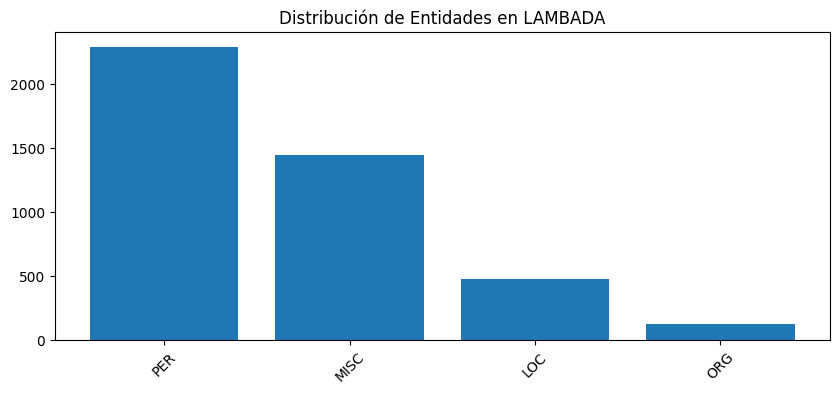

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

'\n--- Resultados para XLSum ---'

'Total de entidades detectadas: 54573'

'Distribución de etiquetas:'

'MISC: 19548'

'LOC: 14775'

'PER: 13044'

'ORG: 7206'

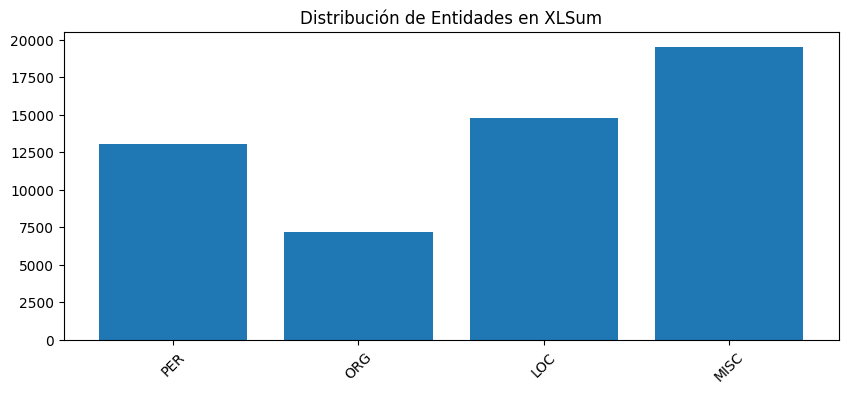

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

'\n--- Resultados para OSCAR ---'

'Total de entidades detectadas: 3362'

'Distribución de etiquetas:'

'MISC: 1475'

'LOC: 741'

'ORG: 669'

'PER: 477'

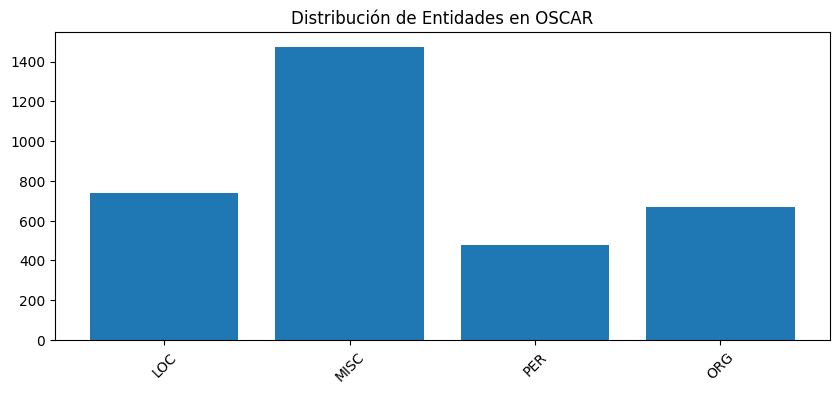

In [7]:
# Cargar el modelo de SpaCy en español
nlp = spacy.load("es_core_news_md")

# Función para extraer entidades de un texto
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return {"entities": entities}

# Aplicar NER a un dataset
def process_dataset(dataset, dataset_name, sample_size=1000):
    # Subconjunto
    sampled_dataset = dataset.select(range(sample_size)) if dataset.num_rows > sample_size else dataset

    # Procesar textos y extraer entidades del subconjunto
    dataset_with_entities = sampled_dataset.map(
        lambda example: extract_entities(example["text"])
    )

    # Contar frecuencias de etiquetas
    all_entities = [entity[1] for example in dataset_with_entities for entity in example["entities"]]
    frecuencias = Counter(all_entities)

    # Mostrar resultados
    display(f"\n--- Resultados para {dataset_name} ---")
    display(f"Total de entidades detectadas: {len(all_entities)}")
    display("Distribución de etiquetas:")
    for etiqueta, count in frecuencias.most_common(10):
        display(f"{etiqueta}: {count}")

    # Graficar
    plt.figure(figsize=(10, 4))
    plt.bar(frecuencias.keys(), frecuencias.values())
    plt.title(f"Distribución de Entidades en {dataset_name}")
    plt.xticks(rotation=45)
    plt.show()

# Procesar cada dataset
process_dataset(ds_lambda, "LAMBDA")
process_dataset(ds_xlsum, "XLSum")
process_dataset(ds_oscar, "OSCAR")

#Conclusiones Ejercicio 2

Lo que podemos observar es que para el corpus de LAMBADA la etiqueta PER es claramente la más frecuente, seguida por MISC, LOC y finalmente ORG en menor proporción. Teniendo en cuenta que LAMBDA está formado por textos narrativos donde se evalúa la capacidad de los modelos para predecir la última palabra de un pasaje, es habitual que en este dominio se hable mucho de personajes(personas) y en menor medidad de organizaciones o lugares específicos, centrándose más en "quién hace qué", lo que se traduce en una mayor cantidad de PER.

 Ahora para el corpus de XLSum, podemos observar que la etiqeuta MISC (etiqueta misceláneas, que pueden incluir eventos, productos, marcas, etc.) es la más numerosa, seguida por LOC (lugares), PER(personas) y por último ORG(organizaciones). Teniendo en cuenta que dicho corpus se trata de un conjunto de datos de noticias de BBC con un amplio rango de temas y con gran cobertura y alcance internacional tiene sentido que MISC sea la etiqueta más frecuente pues en las noticias es común encontrar referencias a un gran variedad de las entidades que no siempre encajan en categorías como persona, lugar u organización.Además, podemos notar que LOC cuenta con un alto receunto, lo que refleja la naturaleza, alcance y cobertura de las noticas, teniendo menciones a muchas localizaciones. También,  podemos observar que PER y ORG también son frecuentes, lo que nos habla de la variedad de temas que podemos encontrar.

 Por útlimo, en el caso del corpus de OSCAR podemos observar que aquí la etiqueta que más predomina con diferencia es MISC seguida por LOC y ORG en menor medida y por último PER. Teniendo en cuenta que el dominio son textos en bruto de la web, el gran número de MISC es un reflejo de la variedad de textos y temas que se encuentran en internet, muchos de los cuales pueden no encajar fácilmente en otras categorías. Esto también explica la baja frecuencia de LOC,PER y ORG en comparación con MISC, pues no se tratan de textos puramente narrativos ni de noticas con un enfoque claro en localizaciones, figuras públicas o personajes.